In [173]:
# scripts for getting all song lyrics from a given artist

import lyricsgenius as lg
import os
from dotenv import load_dotenv
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt


In [174]:
download_lyrics = False

if download_lyrics:
    artist = "Vasco Rossi"
    load_dotenv()
    access_token = os.getenv("GENIUS_ACCESS_TOKEN")

    try:
        genius = lg.Genius(access_token, skip_non_songs=True,
                            excluded_terms=["(Remix)", "(Live)", "Demo", "Version", ], 
                              remove_section_headers=True, timeout=15, sleep_time=0.5, verbose=True)

        artist_songs = genius.search_artist(artist, sort="popularity", get_full_info=False, max_songs=200)

    except Exception as e:
        print(e)
        print("Error in getting artist")
        



In [175]:
if download_lyrics:    
    with open(f'lyrics_{artist}.txt', "w", encoding="utf-8") as f:
        for song in artist_songs.songs:
            f.write(song.lyrics)
            f.write("\n\n")

In [176]:
with open(f'lyrics_{artist}.txt', "r", encoding="utf-8") as f:
    lyrics = f.read()



In [177]:
songs =lyrics.split("Lyrics")
songs
    

['10 ContributorsAlbachiara ',
 "\n\n\nRespiri piano per non far rumore\nTi addormenti di sera\nE ti risvegli col sole\nSei chiara come un'alba\nSei fresca come l'aria\nDiventi rossa se qualcuno ti guarda\nE sei fantastica quando sei assorta\nNei tuoi problemi\nNei tuoi pensieri\nTi vesti svogliatamente\nNon metti mai niente\nChe possa attirare attenzione\nUn particolare\nSolo per farti guardare\nRespiri piano per non far rumore\nTi addormenti di sera\nE ti risvegli col sole\nSei chiara come un'alba\nSei fresca come l'aria\nDiventi rossa se qualcuno ti guarda\nE sei fantastica quando sei assorta\nNei tuoi problemi\nNei tuoi pensieri\nTi vesti svogliatamente\nNon metti mai niente\nChe possa attirare attenzione\nUn particolare\nPer farti guardare\nE con la faccia pulita\nCammini per strada\nMangiando una mela\nCoi libri di scuola\nTi piace studiare\nNon te ne devi vergognare\n\nE quando guardi con quegli occhi grandi\nForse un po' troppo sinceri, sinceri\nSi vede quello che pensi\nQuello

In [178]:
# for each line, put the last \n and following text in a separate line

for i, song in enumerate(songs):
    # identify the last \n
    last_n = song.rfind("\n")
    if last_n!=-1:
        # split the song
        songs[i] = song[:last_n] 
        songs.insert(i+1, song[last_n+1:])
        
        

In [179]:
print(len(songs))
# remove empty songs
songs = [song for song in songs if song.strip()!=""]
print(len(songs))

401
399


In [180]:

songs = [songs[i]+ songs[i+1] for i in range(0, len(songs), 2)]
print(len(songs))

IndexError: list index out of range

In [181]:
songs

['10 ContributorsAlbachiara ',
 "\n\n\nRespiri piano per non far rumore\nTi addormenti di sera\nE ti risvegli col sole\nSei chiara come un'alba\nSei fresca come l'aria\nDiventi rossa se qualcuno ti guarda\nE sei fantastica quando sei assorta\nNei tuoi problemi\nNei tuoi pensieri\nTi vesti svogliatamente\nNon metti mai niente\nChe possa attirare attenzione\nUn particolare\nSolo per farti guardare\nRespiri piano per non far rumore\nTi addormenti di sera\nE ti risvegli col sole\nSei chiara come un'alba\nSei fresca come l'aria\nDiventi rossa se qualcuno ti guarda\nE sei fantastica quando sei assorta\nNei tuoi problemi\nNei tuoi pensieri\nTi vesti svogliatamente\nNon metti mai niente\nChe possa attirare attenzione\nUn particolare\nPer farti guardare\nE con la faccia pulita\nCammini per strada\nMangiando una mela\nCoi libri di scuola\nTi piace studiare\nNon te ne devi vergognare\n\nE quando guardi con quegli occhi grandi\nForse un po' troppo sinceri, sinceri\nSi vede quello che pensi\nQuello

In [166]:
# delete first line of each song
songs = [song[song.find("\n")+1:] for song in songs]
songs

['10 ContributorsAlbachiara ',
 "\n\nRespiri piano per non far rumore\nTi addormenti di sera\nE ti risvegli col sole\nSei chiara come un'alba\nSei fresca come l'aria\nDiventi rossa se qualcuno ti guarda\nE sei fantastica quando sei assorta\nNei tuoi problemi\nNei tuoi pensieri\nTi vesti svogliatamente\nNon metti mai niente\nChe possa attirare attenzione\nUn particolare\nSolo per farti guardare\nRespiri piano per non far rumore\nTi addormenti di sera\nE ti risvegli col sole\nSei chiara come un'alba\nSei fresca come l'aria\nDiventi rossa se qualcuno ti guarda\nE sei fantastica quando sei assorta\nNei tuoi problemi\nNei tuoi pensieri\nTi vesti svogliatamente\nNon metti mai niente\nChe possa attirare attenzione\nUn particolare\nPer farti guardare\nE con la faccia pulita\nCammini per strada\nMangiando una mela\nCoi libri di scuola\nTi piace studiare\nNon te ne devi vergognare\n\nE quando guardi con quegli occhi grandi\nForse un po' troppo sinceri, sinceri\nSi vede quello che pensi\nQuello c

In [167]:
songs=songs[1:]
songs

["\n\nRespiri piano per non far rumore\nTi addormenti di sera\nE ti risvegli col sole\nSei chiara come un'alba\nSei fresca come l'aria\nDiventi rossa se qualcuno ti guarda\nE sei fantastica quando sei assorta\nNei tuoi problemi\nNei tuoi pensieri\nTi vesti svogliatamente\nNon metti mai niente\nChe possa attirare attenzione\nUn particolare\nSolo per farti guardare\nRespiri piano per non far rumore\nTi addormenti di sera\nE ti risvegli col sole\nSei chiara come un'alba\nSei fresca come l'aria\nDiventi rossa se qualcuno ti guarda\nE sei fantastica quando sei assorta\nNei tuoi problemi\nNei tuoi pensieri\nTi vesti svogliatamente\nNon metti mai niente\nChe possa attirare attenzione\nUn particolare\nPer farti guardare\nE con la faccia pulita\nCammini per strada\nMangiando una mela\nCoi libri di scuola\nTi piace studiare\nNon te ne devi vergognare\n\nE quando guardi con quegli occhi grandi\nForse un po' troppo sinceri, sinceri\nSi vede quello che pensi\nQuello che sogni\nQualche volta fai pen

In [168]:
# delete spanish songs
songs = [song for song in songs if "ñ" not in song]

In [90]:
songs =songs[:-3]
songs

["Karma police, arrest this man\nHe talks in maths\nHe buzzes like a fridge\nHe's like a detuned radio\n\nKarma police, arrest this girl\nHer Hitler hairdo is making me feel ill\nAnd we have crashed her party\n\nThis is what you get\nThis is what you get\nThis is what you get\nWhen you mess with us\n\nKarma police, I've given all I can, it's not enough\nI've given all I can, but we're still on the payroll\n\nThis is what you get\nThis is what you get\nThis is what you get\nWhen you mess with us\nYou might also like\nFor a minute there\nI lost myself, I lost myself\nPhew, for a minute there\nI lost myself, I lost myself\nFor a minute there\nI lost myself, I lost myself\nPhew, for a minute there\nI lost myself, I lost myself106Embed\n",
 "A heart that's full up like a landfill\nA job that slowly kills you\nBruises that won't heal\nYou look so tired, unhappy\nBring down the government\nThey don't, they don't speak for us\nI'll take a quiet life\nA handshake of carbon monoxide\n\nAnd no al

In [169]:
songs = [song for song in songs if song != ""]

In [170]:
songs

["\n\nRespiri piano per non far rumore\nTi addormenti di sera\nE ti risvegli col sole\nSei chiara come un'alba\nSei fresca come l'aria\nDiventi rossa se qualcuno ti guarda\nE sei fantastica quando sei assorta\nNei tuoi problemi\nNei tuoi pensieri\nTi vesti svogliatamente\nNon metti mai niente\nChe possa attirare attenzione\nUn particolare\nSolo per farti guardare\nRespiri piano per non far rumore\nTi addormenti di sera\nE ti risvegli col sole\nSei chiara come un'alba\nSei fresca come l'aria\nDiventi rossa se qualcuno ti guarda\nE sei fantastica quando sei assorta\nNei tuoi problemi\nNei tuoi pensieri\nTi vesti svogliatamente\nNon metti mai niente\nChe possa attirare attenzione\nUn particolare\nPer farti guardare\nE con la faccia pulita\nCammini per strada\nMangiando una mela\nCoi libri di scuola\nTi piace studiare\nNon te ne devi vergognare\n\nE quando guardi con quegli occhi grandi\nForse un po' troppo sinceri, sinceri\nSi vede quello che pensi\nQuello che sogni\nQualche volta fai pen

In [93]:
# print longest song

max_len = 0
max_song = ""
max_idx = -1
for i, song in enumerate(songs):
    if len(song)>max_len:
        max_len = len(song)
        max_idx = i
        max_song = song
print(max_len)
print(max_song)

# remove the longest song
songs[max_idx] = ""
songs = [song for song in songs if song.strip()!=""]

2014
Drag him out your window
Dragging out the dead
Singing "I miss you"
Snakes and ladders
Flip the lid
Out pops the cracker
Smacks you in the head
Knifes you in the neck
Kicks you in the teeth
Steel toe caps
Takes all your credit cards
Get up, get the gunge
Get the eggs
Get the flan in the face
The flan in the face
The flan in the face
Dance, you fucker, dance, you fucker
Don't you dare, don't you dare
Don't you, flan in the face
Take it with the love it's given
Take it with a pinch of salt
Take it to the taxman
Let me back, let me back
I promise to be good
Don't look in the mirror
At the face you don't recognize
Help me, call the doctor, put me inside
Put me inside, put me inside
Put me inside, put me inside
You might also like
I keep the wolf from the door but he calls me up
Calls me on the phone, tells me all the ways that he's gonna mess me up
Steal all my children if I don't pay the ransom
And I'll never see them again if I squeal to the cops

No no no no no no no no no no no no

In [135]:
for i in range(len(songs)):

    # if song ends with Embed
    #cancel Embed and eventual numbers before it
    songs[i] = songs[i][:songs[i].rfind("Embed")]
    while songs[i][-1].isnumeric():
        songs[i] = songs[i][:-1]


In [136]:
# index the characters
chars = list(set("".join(songs)))
char_to_index = {c:i for i, c in enumerate(chars)}
index_to_char = {i:c for i, c in enumerate(chars)}

In [137]:
# add two special characters for start and end of song
# check if < and > are already in the characters
if "<" not in chars:
    print("Adding <")
    chars.append("<")

if ">" not in chars:
    print("Adding >")
    chars.append(">")

Adding <
Adding >


In [138]:
char_to_index['<'] = len(chars)-2
char_to_index['>'] = len(chars)-1

index_to_char[len(chars)-2] = "<"
index_to_char[len(chars)-1] = ">"

In [139]:
# add < and > to the songs
songs = [f"<{song}>" for song in songs]


In [140]:
encoded_songs = [[char_to_index[c] for c in song] for song in songs]

In [141]:
input_sequences = [song[:-1] for song in encoded_songs]
output_sequences = [song[1:] for song in encoded_songs]

In [142]:
# one hot encode the sequences
dim_one_hot = len(chars)
input_sequences = [torch.tensor(seq).long() for seq in input_sequences]
output_sequences = [torch.tensor(seq).long() for seq in output_sequences]

In [143]:
# create a dataset

class LyricsDataset(Dataset):
    def __init__(self, input_sequences, output_sequences):
        self.input_sequences = input_sequences
        self.output_sequences = output_sequences
        
    def __len__(self):
        return len(self.input_sequences)
    
    def __getitem__(self, idx):
        return self.input_sequences[idx], self.output_sequences[idx], len(self.input_sequences[idx])

In [144]:
def collate_fn(batch):
    input_sequences = [item[0] for item in batch]
    output_sequences = [item[1] for item in batch]
    lengths= [item[2] for item in batch]
    input_sequences = nn.utils.rnn.pad_sequence(input_sequences, batch_first=True)
    output_sequences = nn.utils.rnn.pad_sequence(output_sequences, batch_first=True)
    return input_sequences, output_sequences, lengths

In [145]:
loader = DataLoader(LyricsDataset(input_sequences, output_sequences), batch_size=2, shuffle=True, collate_fn=collate_fn)

# create the model

class LyricsModel(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_dim, n_layers_lstm=1, dropout=0.):
        super(LyricsModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers_lstm = n_layers_lstm
        self.embed = nn.Embedding(vocab_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_dim, batch_first=True, num_layers=n_layers_lstm, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, vocab_size)
        self.softmax = nn.functional.softmax
        
    def forward(self, x, hidden_states =None):
        x = self.embed(x)
        x, [h, c] = self.lstm(x, hidden_states)
       # x, _ = pad_packed_sequence(x, batch_first=True)
        x = self.fc(x)
        return x, [h,c]
    
    def generate_text(self, max_length, temperature):
        generated = "<"
        last_char = generated
        h = torch.zeros(self.n_layers_lstm, 1, self.hidden_dim, dtype=torch.float32)
        c = torch.zeros(self.n_layers_lstm, 1, self.hidden_dim, dtype=torch.float32)
        with torch.no_grad():
            for i in range(max_length):
                x = torch.tensor(char_to_index[last_char])
                x = x.unsqueeze(0).unsqueeze(0)
                x, [h, c] = self.forward(x, [h, c])
                x = torch.divide(x, temperature)
                x = self.softmax(x, dim=2)
                # draw a sample from x
                last_char = torch.distributions.Categorical(x).sample()
                last_char = index_to_char[last_char.item()]
                generated += last_char
                if last_char == ">":
                    break 
        print(generated)
        return generated


In [146]:
model = LyricsModel(dim_one_hot, 256, 256, n_layers_lstm=2, dropout=0.5)
dataset=LyricsDataset(input_sequences, output_sequences)
optimizer = optim.RMSprop(model.parameters(), lr=0.001)
batch_size =1
dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)

In [147]:
# training loop
from tqdm import tqdm

n_epochs = 5
train_bar =tqdm(range(n_epochs),leave=False )
for epoch in train_bar:
    running_loss =0
    n_seen=0
    for i, (x, y, lens) in enumerate(dataloader):   
        optimizer.zero_grad()
        y_pred, _ = model(x)
        loss = nn.functional.cross_entropy(y_pred.permute(0,2,1), y.data)
        loss.backward()
        optimizer.step()
        loss = loss * batch_size
        n_seen += batch_size
        running_loss +=loss
        train_bar.set_postfix({'running_loss': f'{running_loss/n_seen}', 'batch':f'{i+1}/{len(dataloader)}'})
    print(f"Epoch {epoch}, loss = {running_loss/n_seen}")
    model.generate_text(max_length =1000, temperature = 0.5)

  0%|          | 0/5 [00:50<?, ?it/s, running_loss=2.40093994140625, batch=198/198]  

Epoch 0, loss = 2.40093994140625


 20%|██        | 1/5 [00:52<03:29, 52.39s/it, running_loss=2.40093994140625, batch=198/198]

< amo vere non la varto sose sosa che non li dosco soltare
See bene la non lo che come che senche che tu la colso di di con standa se la cole che non vorsici ta la berto pure sici
Tu soli me lo la ra senta la se senta che non se di cosco sive
See Vare ser cosa non che solo in in per la non sen e dasta si per pore tutto sare
Non bene non costa solo sui
E non la como coso tutto lo alla alla la per di la si trasso presto in porta la non lo somo sole cospa dore non non lo di e mai che non il sonto non no soli di miveti fisci racli allo di pore persi anine
E non sicketta per pie non che che donco più pire da farori alla la ta ce se costo non di tere
E dossa far also polta più coso porto non lo non ta co me
Non se non non se non perda derda di un cike
Anche quasso sola di non vara cole solo darche solo te coma con son $43You non vi sola balsa che sel non e la sola sesco tu lo colla sono solia
Con la se non are
Si mi più cose perri la sera non sole sere non la la per da perti dai che e non si

 20%|██        | 1/5 [01:42<03:29, 52.39s/it, running_loss=1.9374890327453613, batch=198/198]

Epoch 1, loss = 1.9374890327453613


 40%|████      | 2/5 [01:44<02:37, 52.42s/it, running_loss=1.9374890327453613, batch=198/198]

<-ho sempre di a nente sella tutto
E sola una che lo siare
Se non un falso lo prer also la core

Di standi senti conti la te veri
Quella che la solo la mare
Veglia che la ballare che suna para
E viere
Non più la non io un vita
A nienti me che sente del low as $43You mi mi che solo a la sia una in una cosa la la di tutto la non la vetto non no non solo alla di alcore a me
E mi ti più quella la solita
E dami che lo se
Che non la mi che si so
Se sa me la sempre per mi
Che casta per la per di per cosa tu come sente
Che like
Che si di ma
Perché che una la stanta
Vare il low a-
Cosa di di la che alla sera

Anche se non lo la la di tutte che se
Io soli qualche la cosa la non sel le di per contre sia di tutto

Quella guarda una coma più nattina
Pendo la una non anche tu
La fai devo un armi
La non senche lo fatto e la vere
Se me più che sole di una che sempo asci serra
Per la non la sola
Ma come di saca
Che sai che la per di non senti
Che non fa la mi vegio starti
Come l'amore
Se di sola una gi

 40%|████      | 2/5 [02:36<02:37, 52.42s/it, running_loss=1.7836536169052124, batch=198/198]

Epoch 2, loss = 1.7836536169052124


 60%|██████    | 3/5 [02:37<01:45, 52.68s/it, running_loss=1.7836536169052124, batch=198/198]

<Per senso da vero
Non di vente devo cosa
Avore di te gioni con sai perchiamo sei quelluno che sei vero di prata
Sento la solo solo che così
Ma dovere, fare do per che
Se farai adesso come che sei il vole
E che non sei quella che non se cose che sempre
Non si aveste cosa casci credi sentro
Di me e volto sono sei ma prendi di te
Quanto che sole sente non ci volto anche ti possi perché con si sempre costa che solo sei più
See Vasco Rossi LiveGet tickets as low as $43You might also like>


 60%|██████    | 3/5 [03:35<01:45, 52.68s/it, running_loss=1.688524603843689, batch=198/198] 

Epoch 3, loss = 1.688524603843689


 80%|████████  | 4/5 [03:37<00:55, 55.55s/it, running_loss=1.688524603843689, batch=198/198]

<Per sono più un porto tutto possi pentere più che te se sono an penso
Non che se piaci guardo
Non si piore che non non senso per più
Non sentro che non sento sposta stanta
Vivere parso mi per piaci non sente sentro cosa sentro
Lo so fare di per te
Ma bene senti a ristare di mente più penso di spatore
Sentro fare sentro andono coso te
Non ci piesti partare
Se se male di sogno
Vi guardo con per ti sentre con sono di fare dentro solo
Senza vitare tu perfentro
Tu allo come stare
Io cosa vivere, mi vuoi di dentro che
Non ci pio ti piщ pendo
Se stere cosa di per fare dentro non più non posso posso pianto, desso
E se stato sia che cosa passo tu cosa cosa sento
Se sai di guardere
Non sono puro che ti stare
Che se per mesto rendo di vedere spientre sente fare una di per me
Che sei
Non sensa pensio per te
Se ti mai con cosa tu sel mando che te
Per cosa sera a mai
Conta delle sempre questo spupo perso
Se se non è sai
Se sento che se mio donna sto pensa
Ma vidi sentro
E non lo so che sensa
Che no

 80%|████████  | 4/5 [04:35<00:55, 55.55s/it, running_loss=1.6171315908432007, batch=198/198]

Epoch 4, loss = 1.6171315908432007


<Se sta non sei sempre di dici così
Se siamo via
Quante piaci ricordo sempre il mia
Di da nermi
E siamo siamo più
Non si predi di me!
Sei sei di noi
Così i credi
Perché sei semincia
See Vasco Rossi LiveGet tickets as low as $43You might also like
Che cosa facile
Sare quello che solo che si più
E non mai che cosa così
Che cosa il perdiso
Solo sono che
See Vasco Rossi LiveGet tickets as low as $43You might also likeGittariamo
E che non sei di piaci più
Sai piaci così intermi e no
Non star il molta così
Sola l'amore, io solo
E che non siami tu
See Vasco Rossi LiveGet tickets as low as $43You might also like>


In [148]:
print(char_to_index)
print(index_to_char)
dim_one_hot = len(chars)    
print(dim_one_hot)

{'O': 0, ')': 1, '.': 2, 'ì': 3, 'S': 4, '2': 5, 'Ã': 6, 'Й': 7, '!': 8, '$': 9, 'ˆ': 10, 'à': 11, 'v': 12, 'g': 13, 'N': 14, 'P': 15, 'r': 16, 'Q': 17, 'т': 18, 'м': 19, 'p': 20, '—': 21, '“': 22, 'è': 23, 'D': 24, 'e': 25, 'l': 26, 'A': 27, ',': 28, 'h': 29, 'o': 30, 'Z': 31, 'T': 32, 'B': 33, 'q': 34, 'й': 35, '¬': 36, '4': 37, '1': 38, 'щ': 39, 'É': 40, 'c': 41, 'И': 42, 'y': 43, 's': 44, 'È': 45, 'u': 46, '”': 47, '©': 48, 'J': 49, "'": 50, 'а': 51, '\n': 52, 'j': 53, 'I': 54, '¹': 55, 'w': 56, 'z': 57, 'M': 58, '(': 59, ' ': 60, 'À': 61, '*': 62, '6': 63, '?': 64, 'І': 65, 'H': 66, '²': 67, '¨': 68, '"': 69, 'F': 70, '8': 71, '\u2005': 72, 'f': 73, '3': 74, 'L': 75, '-': 76, '‘': 77, '…': 78, 'ù': 79, 'C': 80, 'b': 81, 'R': 82, 'a': 83, ':': 84, 'е': 85, 'ò': 86, 'G': 87, 'n': 88, '’': 89, 't': 90, 'i': 91, ';': 92, 'н': 93, 'W': 94, 'x': 95, 'é': 96, 'k': 97, 'V': 98, 'и': 99, 'm': 100, '/': 101, 'Y': 102, 'U': 103, 'd': 104, '0': 105, 'E': 106, '\u205f': 107, '<': 108, '>': 109

torch.Size([921, 110])


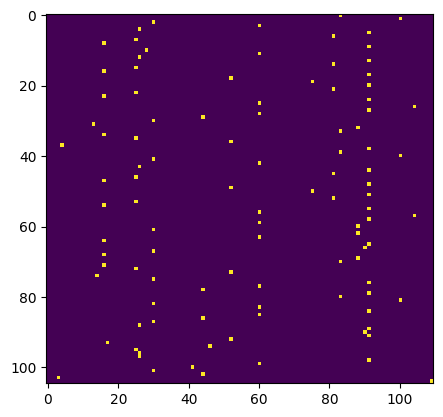

In [149]:
# one hot encode y and plot

one_hot_y = nn.functional.one_hot(y[0], num_classes=dim_one_hot).float()
print(one_hot_y.shape)
plt.imshow(one_hot_y[-105:])

In [150]:
def generate_text_from_seed(model, seed, temperature, max_length=1000):
    generated = seed
    seed = [char_to_index[c] for c in seed]
    seed = torch.tensor(seed).long()
    seed = seed.unsqueeze(0)
    model.eval()
    logits, [h, c] = model(seed)
    logits = torch.divide(logits, temperature)
    logits=logits[:, -1,:]
    print(logits.shape)
    softmax_values = model.softmax(logits, dim=1)

    last_char = torch.distributions.Categorical(softmax_values).sample()
    last_char = index_to_char[last_char.item()]
    generated += last_char
    for i in range(max_length):
        x = torch.tensor(char_to_index[last_char])
        x = x.unsqueeze(0).unsqueeze(0)
        x, [h, c] = model.forward(x, [h, c])
        x = torch.divide(x, temperature)
        x = model.softmax(x, dim=2)
        # draw a sample from x
        last_char = torch.distributions.Categorical(x).sample()
        last_char = index_to_char[last_char.item()]
        generated += last_char
        if last_char == ">":
            break
    print(generated)

In [153]:
generate_text_from_seed(model, "Respiri piano", 0.9)

torch.Size([1, 110])
Respiri piano
Sai vuoi con ogni solo
Perché six, già
Non Ol mimile
See Vasco Rossi LiveGet tickets as low as $43You might also like
Una predi di ti un fidi
Ci chi tidere
Ogli piase inutiole
Sono in merdo le
Non senza dove poi porto tu

Non si perdidere non corminia
E non è mi facino, giorni
"rautto lei fino cormano
E di più
Certo a sempre: filia
Che così? Urai
See Vasco Rossi LiveGet tickets as low as $43You migrio adi
O no!!, Ooh nol!

Io si diverti piùgliato
Ti vigioni i come somprisonde, che non la scosto
Armi
Non sono fali
T''ami compiamo
? favrivina di vieti
Che cosa guai
Sei bisoli fine?
Perché cosa che ti urgio
Primi di perdele"
See Vasco Rossi
La fericpianda e stetso a sei avI
È con tutta di disperto ti
Aspettire il sepriti che vivere
Fare, il rimore climini
Egmi verio!See Vasascia dombuna
Perché cose convieni che cosa essuspa e tu di solia ogni ogneri
Senza gioché
Che io sei che ii viviti, sere
Afvevi viulicile
Che è un vigire che cosa esso
Dice che senza 